# Loading data form Kaggle competition

In [0]:
!unzip fruit-images-for-object-detection.zip 

Archive:  fruit-images-for-object-detection.zip
caution: filename not matched:  fruit-images-for-object-detection/


In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

Using TensorFlow backend.


# Preparing train set

In [0]:
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = 'train_zip/train'

for filename in os.listdir('train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

# Prepare test set

In [0]:

test_images = []
test_labels = []
shape = (200,200)
test_path = 'test_zip/test'

for filename in os.listdir('test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0]


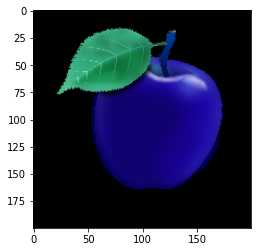

In [0]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

# Train model with multiclass classification

In [0]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [0]:
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))


Train on 180 samples, validate on 60 samples
Epoch 1/20
180/180 [==============================] - 22s 122ms/step - loss: 3.6358 - acc: 0.2556 - val_loss: 1.3302 - val_acc: 0.3500
Epoch 2/20
180/180 [==============================] - 22s 123ms/step - loss: 1.4112 - acc: 0.3167 - val_loss: 1.3367 - val_acc: 0.3500
Epoch 3/20
180/180 [==============================] - 22s 122ms/step - loss: 1.2377 - acc: 0.3944 - val_loss: 1.3084 - val_acc: 0.3333
Epoch 4/20
180/180 [==============================] - 22s 121ms/step - loss: 1.1274 - acc: 0.6556 - val_loss: 1.2894 - val_acc: 0.4167
Epoch 5/20
180/180 [==============================] - 22s 121ms/step - loss: 0.9571 - acc: 0.6500 - val_loss: 0.8876 - val_acc: 0.6500
Epoch 6/20
180/180 [==============================] - 22s 122ms/step - loss: 0.6092 - acc: 0.7667 - val_loss: 0.5657 - val_acc: 0.7333
Epoch 7/20
180/180 [==============================] - 22s 123ms/step - loss: 0.4828 - acc: 0.8444 - val_loss: 1.0554 - val_acc: 0.6833
Epoch 8/20

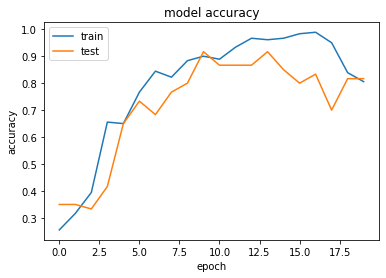

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

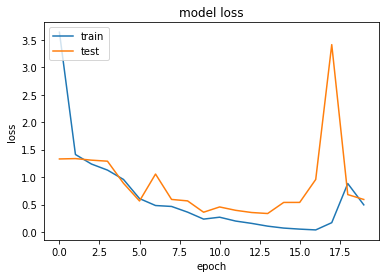

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

60/60 [==============================] - 2s 28ms/step
[0.5928255001703898, 0.8166666626930237]


In [0]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['banana']
Predicted :-  banana
